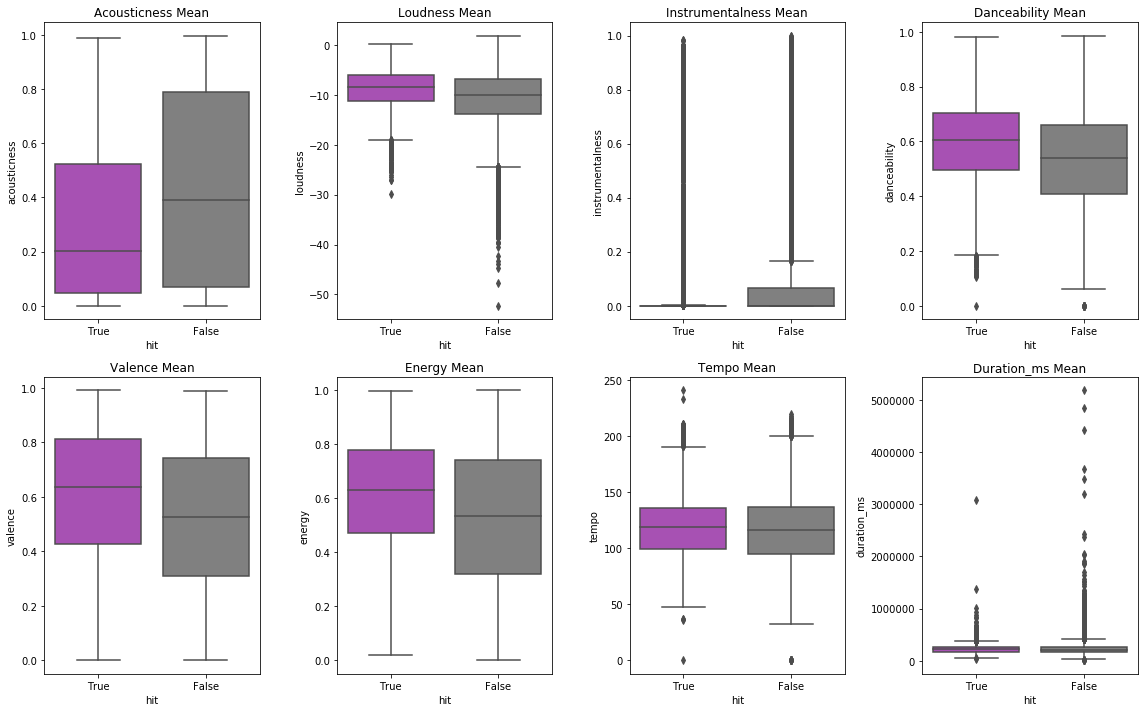

In [5]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import Data
train = pd.read_csv('../data/processed/train.csv',sep='\t',parse_dates=['date','entry_date','exit_date','peak_date','max_leap_date']).set_index(['artist','title'])

fig, (ax1,ax2) = plt.subplots(2,4,figsize=(16,10))
sns.boxplot(x='hit',y='acousticness',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax1[0])
_ = ax1[0].set_title('Acousticness Mean')
sns.boxplot(x='hit',y='loudness',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax1[1])
_ = ax1[1].set_title('Loudness Mean')
sns.boxplot(x='hit',y='instrumentalness',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax1[2])
_ = ax1[2].set_title('Instrumentalness Mean')
sns.boxplot(x='hit',y='danceability',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax1[3])
_ = ax1[3].set_title('Danceability Mean')
sns.boxplot(x='hit',y='valence',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax2[0])
_ = ax2[0].set_title('Valence Mean')
sns.boxplot(x='hit',y='energy',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax2[1])
_ = ax2[1].set_title('Energy Mean')
sns.boxplot(x='hit',y='tempo',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax2[2])
_ = ax2[2].set_title('Tempo Mean')
sns.boxplot(x='hit',y='duration_ms',data=train,order=[True,False],palette=['#b440c4','gray'],ax=ax2[3])
_ = ax2[3].set_title('Duration_ms Mean')
_ = plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

# Seed Random
np.random.seed(500)

# Set default for figure sizes
mlp.rcParams['figure.figsize'] = (16,6)

def bins_rule_of_thumb(data):
    return int(np.sqrt(len(data)))

# Define Comparison Function Difference of Means
def mean_diff(data1,data2):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    return mean1 - mean2

# Create Permutation Sample Function
def permutation_sample(data1,data2):
    """
    Creates a Permutation Sample from two data sets and returns two permutated samples 
    with the same length as the original sets.
    """
    data_both = np.concatenate((data1,data2))
    data_perm = np.random.permutation(data_both)
    perm_sample_1 = data_perm[:len(data1)]
    perm_sample_2 = data_perm[len(data1):]
    return (perm_sample_1,perm_sample_2)

# Define function to generate Permutation Replicates
def draw_perm_reps(data1,data2,func,size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1,perm_sample_2 = permutation_sample(data1,data2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
        
    return perm_replicates

def ecdf(data):
    """
    Returns the x,y values for data for plotting as an ecdf.
    """
    # Sort the data along the x-axis
    x = np.sort(data)
    
    # Index the data at equidistant intervals
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x,y

def test_mean_diff(data1,data2,mean_diff_val,ax,h0_diff=0):
    perm_replicates = draw_perm_reps(data1,data2,mean_diff,10000)

    if mean_diff_val > 0:
        p = np.sum(perm_replicates >= mean_diff_val) / len(perm_replicates)
        print("p: {}".format(p))
    else:
        p = np.sum(perm_replicates <= mean_diff_val) / len(perm_replicates)
        print("p: {}".format(p))

    CI = np.percentile(perm_replicates,[2.5,97.5])
    print("CI: {}".format(CI))

    ME = CI[1] - np.mean(perm_replicates)
    print("ME: {}".format(ME))

    dist_ax = sns.distplot(perm_replicates,bins=25,color='gray',ax=ax)
    max_dist_y = np.array([h.get_height() for h in dist_ax.patches]).max()
    _ = ax.set_xlabel('Mean Difference of {}'.format(data1.name))
    _ = ax.set_ylabel('Density')
    if mean_diff_val >= 0:
        _ = ax.set_xlim(-mean_diff_val - -mean_diff_val * 0.05,mean_diff_val + mean_diff_val * 0.05)
    else:
        _ = ax.set_xlim(mean_diff_val - -mean_diff_val * 0.05,-mean_diff_val + mean_diff_val * 0.05)
    _ = ax.legend(['p: {}\nCI: {}'.format(p,CI)],loc='upper left')
    _ = ax.annotate(s='',xy=(mean_diff_val,0),xytext=(mean_diff_val,max_dist_y*0.2),
                     arrowprops={'width':1.5,'headwidth':5,'color': 'red'})
    _ = plt.tight_layout()

p: 0.0
CI: [-0.00712747  0.00725573]
ME: 0.007256800634146884


/Users/sebastian/anaconda3/envs/hit_predictor/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p: 0.0
CI: [-0.106758    0.10935205]
ME: 0.10849807720106644
p: 0.0
CI: [-0.00545507  0.00552981]
ME: 0.0055609278768464785
p: 0.0
CI: [-0.00374573  0.00372643]
ME: 0.0037188101845608557
p: 0.0
CI: [-0.00564837  0.00551543]
ME: 0.005516995159031727
p: 0.0
CI: [-0.00528616  0.00529429]
ME: 0.005255728431750012
p: 0.0
CI: [-0.65386926  0.63785886]
ME: 0.6415984632225189
p: 0.0
CI: [-2549.58327985  2534.92665064]
ME: 2537.79503185433


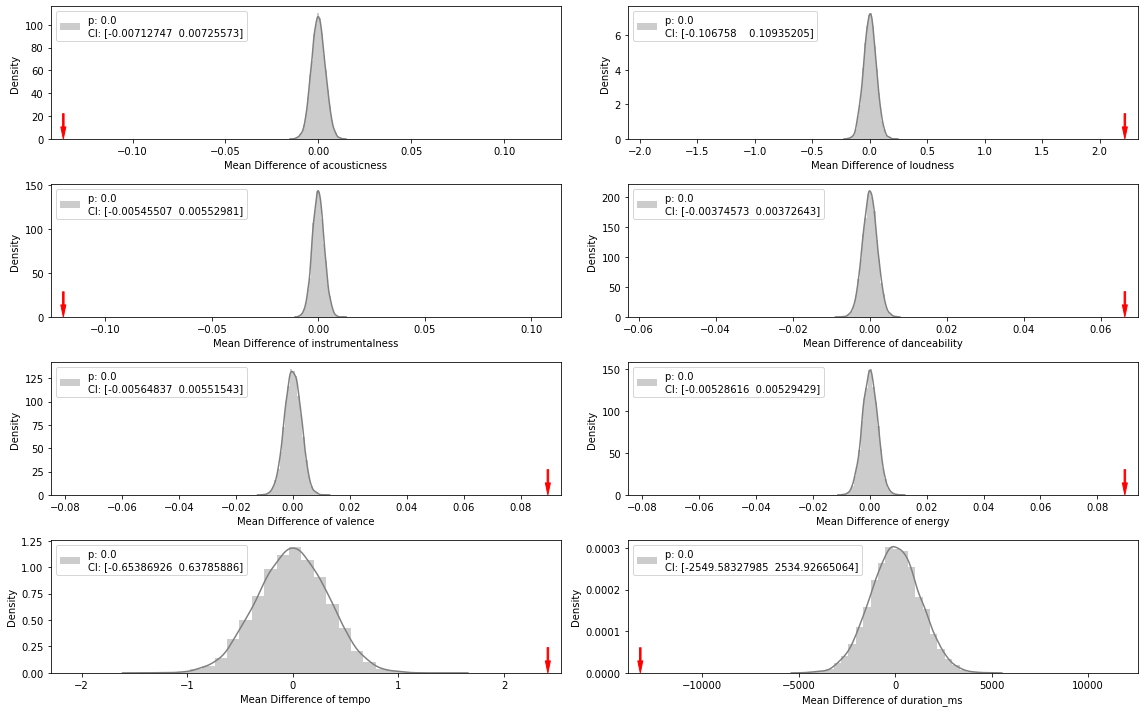

In [3]:
hits = train.loc[train.hit == True,:].copy()
nhits = train.loc[train.hit == False,:].copy()

features = ['acousticness','loudness','instrumentalness','danceability','valence','energy','tempo','duration_ms']

hits_features = hits.loc[:,features].dropna()
nhits_features = nhits.loc[:,features].dropna()

hits_nhits_diff = hits_features.mean() - nhits_features.mean()
h0_diff = 0

fig, ax = plt.subplots(4,2,figsize=(16,10))

axes = np.concatenate(ax)

for feature, ax in zip(features,axes):
    h = hits_features[feature]
    nh = nhits_features[feature]
    h_nh_diff = hits_nhits_diff[feature]
    test_mean_diff(h,nh,h_nh_diff,ax)

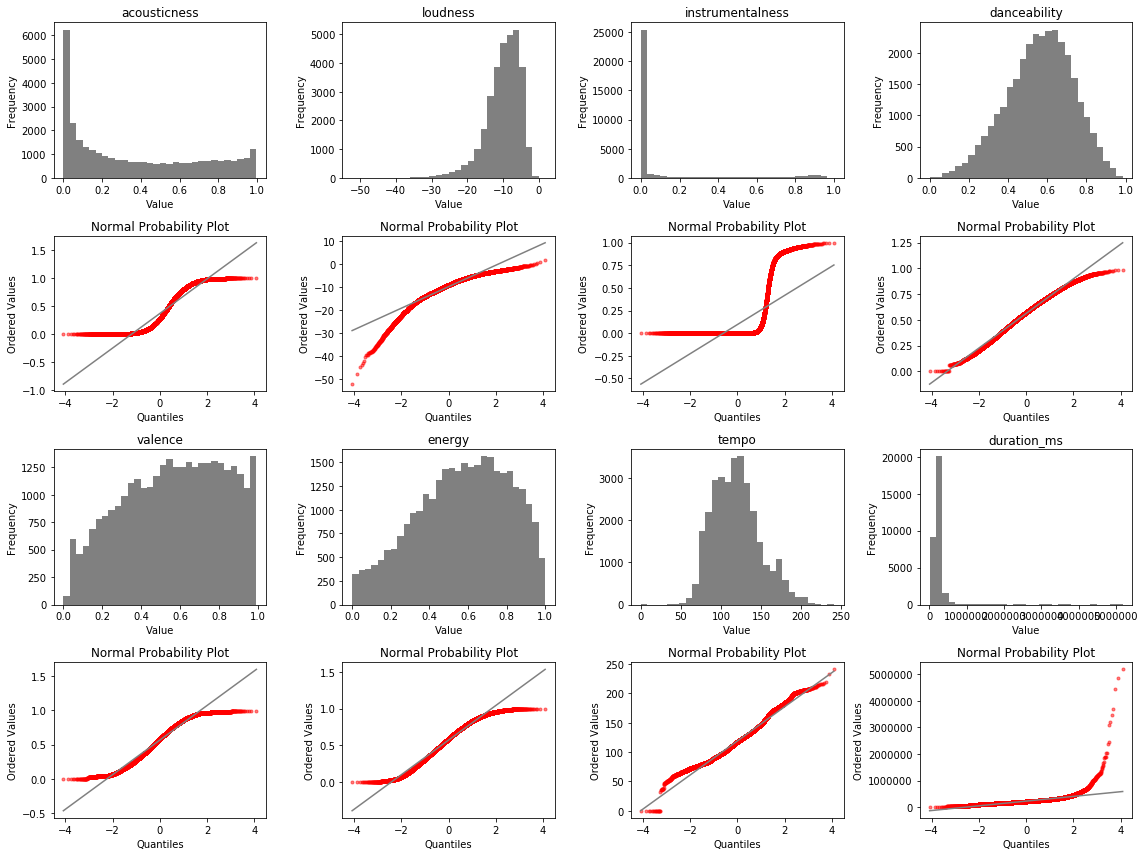

In [4]:
import scipy.stats as stats

def lreg_line(slope,intercept,test_data):
    x_lreg = np.array([min(test_data),max(test_data)])
    y_lreg = slope * x_lreg + intercept
    return x_lreg,y_lreg
        
def qq_plot(data,ax_upper,ax_lower,feature):
    data_no_na = data.dropna()
    _ = ax_upper.hist(data_no_na, color='gray',bins=30)
    _ = ax_upper.set_xlabel('Value')
    _ = ax_upper.set_ylabel('Frequency')
    _ = ax_upper.set_title(feature)
    (x,y), (slope,intercept,r) = stats.probplot(data_no_na, dist="norm", plot=None)
    _ = ax_lower.plot(x,y,marker='.',linestyle='none',color='red',alpha=0.5)
    x_lreg,y_lreg = lreg_line(slope,intercept,x)
    _ = ax_lower.plot(x_lreg,y_lreg,color='gray')
    _ = ax_lower.set_xlabel('Quantiles')
    _ = ax_lower.set_ylabel('Ordered Values')
    _ = ax_lower.set_title('Normal Probability Plot')
    plt.tight_layout()

features = ['acousticness','loudness','instrumentalness','danceability','valence','energy','tempo','duration_ms','time_signature','key','mode']
no_discrete_ft = ['acousticness','loudness','instrumentalness','danceability','valence','energy','tempo','duration_ms']

fig, ax = plt.subplots(4,4,figsize=(16,12))
axes = np.concatenate([ax[:2].T,ax[2:].T])

for feature, ax in zip(no_discrete_ft,axes):
    qq_plot(train[feature],ax[0],ax[1],feature)